# Tweet Sentiment Analysis

---

In [1]:
# General purpose packages
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup

# Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

# Natural Language ToolKit (For NLP)
# For downloading datasets run: nltk.download()
# nltk.download("movie_reviews")
# nltk.download("stopwords")
# nltk.download("omw-1.4")
import nltk
from nltk.corpus import movie_reviews
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import stopwords

In [2]:
# Stop words are words that have low importance in a sentence
stop_words = stopwords.words("english")
print(stop_words[0:10])
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
179


#### Loading movie_review Dataset

In [3]:
words = movie_reviews.words()
print(words)
# Total number of words in the movie review
print(len(words))

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
1583820


In [4]:
categories = movie_reviews.categories()
print(categories)

['neg', 'pos']


In [5]:
clean_words = [w for w in words if w not in stop_words and w.isalpha()]

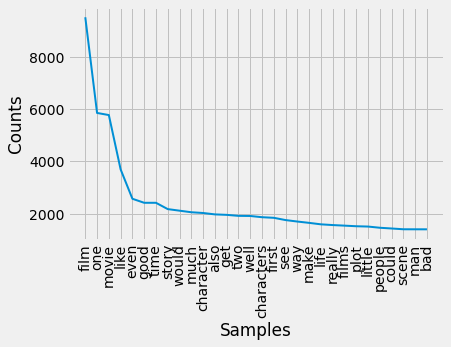

[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049), ('character', 2020), ('also', 1967), ('get', 1949), ('two', 1911), ('well', 1906), ('characters', 1859), ('first', 1836), ('see', 1749), ('way', 1693), ('make', 1642), ('life', 1586), ('really', 1558), ('films', 1536), ('plot', 1513), ('little', 1501), ('people', 1455), ('could', 1427), ('scene', 1397), ('man', 1396), ('bad', 1395)]


In [6]:
freq_dist = nltk.probability.FreqDist(clean_words)
freq_dist.plot(30)
plt.show()
print(freq_dist.most_common(30))

In [7]:
nltk.FreqDist(clean_words).most_common(8)

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169)]

#### WordCloud

In [8]:
from wordcloud import WordCloud

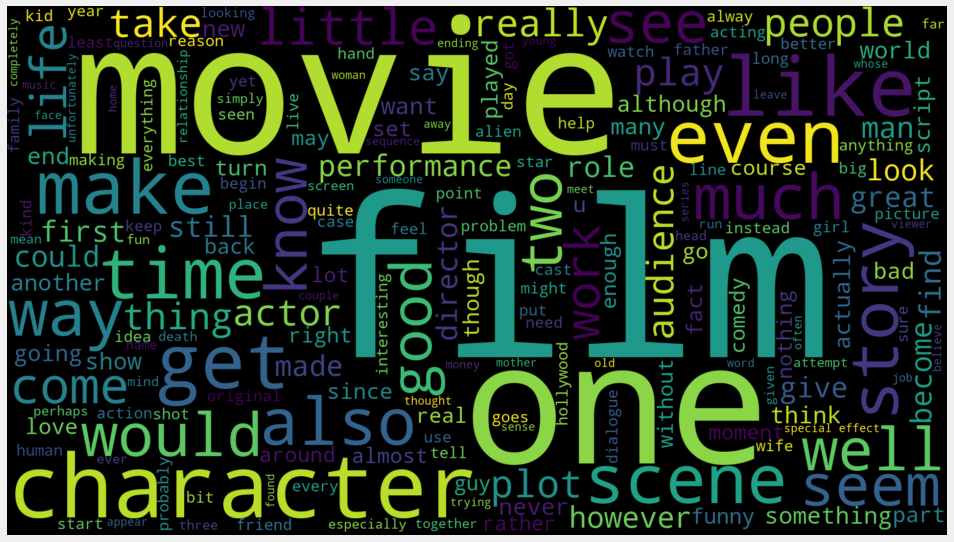

In [9]:
text = " ".join(clean_words)
wordcloud = WordCloud(stopwords=stop_words, background_color="black",
                     width=1920, height=1080).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

---

#### Loading IMDB Dataset

In [10]:
df = pd.read_csv("./Datasets/imdb.csv")

In [11]:
df.sample(5)

,review,sentiment
48608,"Okay, I grew up on Who, but haven't loved a Do...",positive
34547,"""The Notorious Bettie Page"" (2005) <br /><br /...",positive
10591,Bad Movie! Bad! Go stand in a discount bin. Ca...,negative
42205,Chupacabra: Dark Waters has to rank as one of ...,negative
48483,If you like The Three Stooges you'll undoubted...,negative


In [12]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


(50000, 2)

In [13]:
df.groupby("sentiment").count()

,review
sentiment,
negative,25000
positive,25000


#### Cleaning the Reviews

In [14]:
# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub("\[[^]]","", text)

# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

# hold only numbers and alphabet
def remove_special_characters(text):
    return re.sub(r"[^a-zA-Z0-9\s]","",text)


# Removing the noisy text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    return text.lower()

In [15]:
# Apply clean_text function to review column
df["clean_review"] = df["review"].apply(clean_text)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [16]:
df.head(5)

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


---

#### Text Stemming

Stemming is a natural language processing technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization

In [17]:
def stem_text(text):
    ps = nltk.porter.PorterStemmer()
    text = " ".join([ps.stem(word) for word in text.split()])
    return text

In [18]:
df["stemmed_review"] = df["clean_review"].apply(stem_text)

In [19]:
df["stemmed_review"].head(4)

0    one of the other review ha mention that after ...
1    a wonder littl product the film techniqu is ve...
2    i thought thi wa a wonder way to spend time on...
3    basic there a famili where a littl boy jake th...
Name: stemmed_review, dtype: object

#### Text Lemmatizing

is a technique to break a word down to its root meaning to identify similarities

In [20]:
# lemm the text
def lemmatize_text(text):
    lm = WordNetLemmatizer()
    text = " ".join([lm.lemmatize(word) for word in text.split()])
    return text

In [21]:
# Apply lemmetize_text to stemmed_review
df["lemmatized_review"] = df["stemmed_review"].apply(lemmatize_text)

In [22]:
df.head(2)

,review,sentiment,clean_review,stemmed_review,lemmatized_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other review ha mention that after ...,one of the other review ha mention that after ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,a wonder littl product the film techniqu is ve...,a wonder littl product the film techniqu is ve...


In [23]:
df["lemmatized_review"].head(3)

0    one of the other review ha mention that after ...
1    a wonder littl product the film techniqu is ve...
2    i thought thi wa a wonder way to spend time on...
Name: lemmatized_review, dtype: object

In [24]:
# Removing the stopwords
def remove_stopwords(text):
    return " ".join([w for w in text.split() if w not in stop_words])

In [25]:
df["review_without_stopwords"] = df["lemmatized_review"].apply(remove_stopwords)

In [26]:
text = " ".join([word for word in df["review_without_stopwords"]])

In [27]:
wordcloud1 = WordCloud(stopwords=stop_words, background_color="black",
                      width=1920, height= 1080).generate(text)

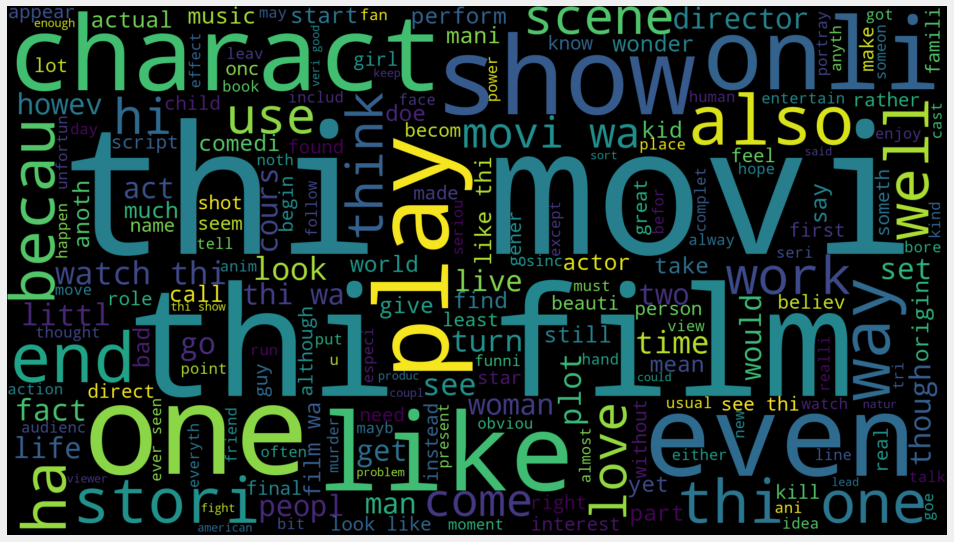

In [28]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

---

### Implementing Machine Learning Models

In [29]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#### Split the dataset

In [30]:
# Train dataset
X_train = df["lemmatized_review"][0:40_000]
y_train = df["sentiment"][0:40_000]

In [31]:
# Test dataset
X_test = df["lemmatized_review"][40_000:]
y_test = df["sentiment"][40_000:]

In [32]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000,) (40000,)
(10000,) (10000,)


#### Bag of Words

It is used to convert text documents to numerical vectors of bag of words

In [33]:
# Count vectorizer for bag of words
cv = CountVectorizer(min_df=0, max_df=1, binary=False,
                 ngram_range=(1,3))
# transformed train reviews
cv_train_reviews = cv.fit_transform(X_train)
# transformed test reviews
cv_test_reviews = cv.transform(X_test)

print("BOW_cv_train:", cv_train_reviews.shape)
print("BOW_cv_test:", cv_test_reviews.shape)

BOW_cv_train: (40000, 6026594)
BOW_cv_test: (10000, 6026594)


#### Term Frequency-Inverse Document Frequency  (TFIDF)


It is used to convert text documents to matrix of tfidf features.

In [34]:
# TFIDF vectorizer
tv = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1,3))
# transformed train reviews
tv_train_reviews = tv.fit_transform(X_train)
# transformed test reviews
tv_test_reviews = tv.transform(X_test)
print("Tfidf_train:", tv_train_reviews.shape)
print("Tfidf_test:", tv_test_reviews.shape)

Tfidf_train: (40000, 6026594)
Tfidf_test: (10000, 6026594)


#### Import LogisticRegression and MultinomialNB

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

### Train LogisticRegression on Bag of Words and TFIDF

In [36]:
# LogisticRegression Model
lr = LogisticRegression(penalty="l2",max_iter=500, C=1,
                       random_state=42)

#### Fitting lr on Bag of Words

In [37]:
lr_bow = lr.fit(cv_train_reviews, y_train)
print(lr_bow)

LogisticRegression(C=1, max_iter=500, random_state=42)


#### Fitting lr on TFIDF

In [38]:
lr_tfidf = lr.fit(tv_train_reviews, y_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)


#### Predicting lr_bow on train dataset

In [39]:
lr_bow_predict_train = lr.predict(cv_train_reviews)
print(lr_bow_predict_train)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


#### Predicting lr_tfidf on train dataset

In [40]:
lr_tfidf_predict_train = lr.predict(tv_train_reviews)
print(lr_tfidf_predict_train)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


#### Import Metrics

In [41]:
from sklearn.metrics import accuracy_score, classification_report

#### Accuracy Score for lr_bow train dataset

In [42]:
# Accuracy score for bag of words train dataset
lr_bow_score_train = accuracy_score(y_train, lr_bow_predict_train)
print("lr_bow_score_train is:  ", lr_bow_score_train)

lr_bow_score_train is:   0.99635


#### Accuracy Score for lr_tfidf train dataset

In [43]:
lr_tfidf_score_train = accuracy_score(y_train, lr_tfidf_predict_train)
print("lr_tfidf_score_train is:  ", lr_tfidf_score_train)

lr_tfidf_score_train is:   0.99635


#### Predicting lr_bow on test dataset

In [44]:
lr_bow_predict_test = lr.predict(cv_test_reviews)
print(lr_bow_predict_test)

['positive' 'negative' 'negative' ... 'negative' 'positive' 'positive']


#### Predicting lr_tfidf on test dataset

In [45]:
lr_tfidf_predict_test = lr.predict(tv_test_reviews)
print(lr_tfidf_predict_test)

['positive' 'negative' 'negative' ... 'negative' 'positive' 'positive']


#### Accuracy Score for lr_bow test dataset

In [46]:
lr_bow_score_test = accuracy_score(y_test, lr_bow_predict_test)
print("lr_bow_score_test is:  ", lr_bow_score_test)

lr_bow_score_test is:   0.7601


#### Accuracy Score for lr_tfidf train dataset

In [47]:
lr_tfidf_score_test = accuracy_score(y_test, lr_tfidf_predict_test)
print("lr_tfidf_score_test is:  ", lr_tfidf_score_test)

lr_tfidf_score_test is:   0.7575


---

#### Classification Report for bag of words

In [48]:
lr_bow_report = classification_report(y_test, lr_bow_predict_test, target_names=["Positive","Negative"])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.76      0.76      0.76      4993
    Negative       0.76      0.76      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



#### Classification Report for tfidf

In [49]:
lr_tfidf_report = classification_report(y_test, lr_tfidf_predict_test, target_names=["Positive","Negative"])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.78      0.76      4993
    Negative       0.77      0.74      0.75      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



---

### Train Multinomial Naive Bayes on Bag of Words and TFIDF

#### MultinomialNB

In [51]:
mnb = MultinomialNB()

#### fitting mnb on bag of words

In [52]:
mnb_bow = mnb.fit(cv_train_reviews, y_train)
print(mnb_bow)

MultinomialNB()


#### fitting mnb on tfidf

In [53]:
mnb_tfidf = mnb.fit(tv_train_reviews, y_train)
print(mnb_tfidf)

MultinomialNB()


#### Predicting mnb_bow on train dataset

In [55]:
mnb_bow_predict_train = mnb.predict(cv_train_reviews)
print(mnb_bow_predict_train)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


#### Predicting mnb_tfidf on train dataset

In [54]:
mnb_tfidf_predict_train = mnb.predict(tv_train_reviews)
print(mnb_tfidf_predict_train)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


#### Accuracy Score for mnb_bow train dataset

In [60]:
mnb_bow_score_train = accuracy_score(y_train, mnb_bow_predict_train)
print("mnb_bow_score_train is:  ", mnb_bow_score_train)

mnb_bow_score_train is:   0.99635


#### Accuracy Score for mnb_tfidf train dataset

In [61]:
mnb_tfidf_score_train = accuracy_score(y_train, mnb_tfidf_predict_train)
print("mnb_tfidf_score_train is:  ", mnb_tfidf_score_train)

mnb_tfidf_score_train is:   0.99635


#### Predicting mnb_bow on test dataset

In [58]:
mnb_bow_predict_test=mnb.predict(cv_test_reviews)
print(mnb_bow_predict_test)

['positive' 'negative' 'negative' ... 'negative' 'positive' 'positive']


#### Predicting mnb_tfidf on test dataset

In [59]:
mnb_tfidf_predict_test=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict_test)

['positive' 'negative' 'negative' ... 'negative' 'positive' 'positive']


#### Accuracy Score for mnb_bow test dataset

In [63]:
mnb_bow_score_test = accuracy_score(y_test,mnb_bow_predict_test)
print("mnb_bow_score_test :",mnb_bow_score_test)

mnb_bow_score_test : 0.7595


#### Accuracy Score for mnb_tfidf test dataset

In [64]:
mnb_tfidf_score_test =accuracy_score(y_test,mnb_tfidf_predict_test)
print("mnb_tfidf_score_test :",mnb_tfidf_score_test)

mnb_tfidf_score_test : 0.7601


#### Classification Report for bag of words

In [65]:
mnb_bow_report=classification_report(y_test,mnb_bow_predict_test,target_names=['Positive','Negative'])
print(mnb_bow_report)

              precision    recall  f1-score   support

    Positive       0.76      0.77      0.76      4993
    Negative       0.76      0.75      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



#### Classification Report for tfidf

In [66]:
mnb_tfidf_report=classification_report(y_test,mnb_tfidf_predict_test,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.77      0.76      4993
    Negative       0.76      0.75      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



# Well Done!